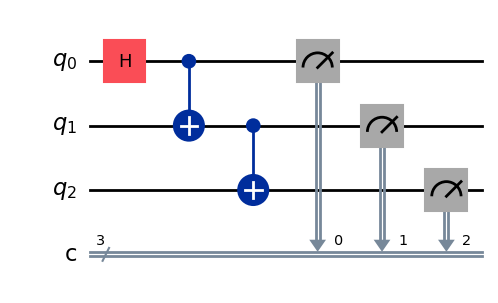

In [1]:
import os
from azure.quantum import Workspace
from azure.quantum.qiskit import AzureQuantumProvider
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import transpile
from matplotlib import pyplot

# It is highly recommended to use environment variables.
#provider = AzureQuantumProvider(resource_id="ID HERE", location="LOCATION HERE")
workspace = Workspace(resource_id=os.environ['resource_id'], location=os.environ['azure_location'])
provider = AzureQuantumProvider(workspace)
# Selecting a backend
# Use simulators to test before running it on real hardware.
backend = provider.get_backend("ionq.simulator")

circuit = QuantumCircuit(3, 3)
circuit.name = "My First Quantum Program"
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure([0,1,2], [0, 1, 2])

circuit.draw('mpl')


.......

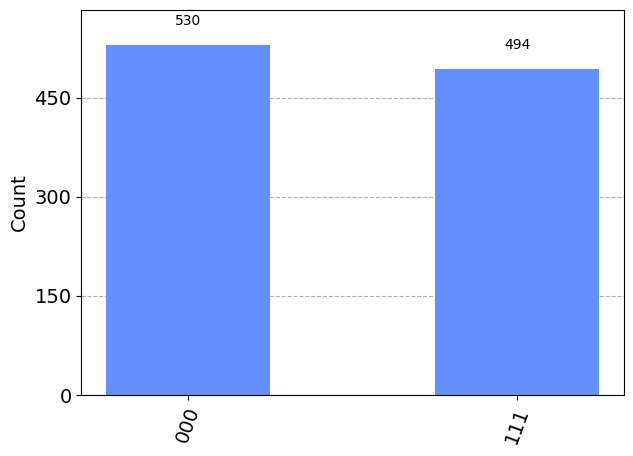

In [2]:
# Transpile circuit to work with the current backend.
qc_compiled = transpile(circuit, backend)
# Run the job
# This will cause a pop where you have to authenticate with azure.
job_sim = backend.run(qc_compiled, shots=1024)

# Get the result
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)

# Plot the result
plot_histogram(counts)